In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

## Loading Data sets

In [16]:
# Dataset 1 from Homework 1: credit cards
credit = pd.read_csv("creditcard.csv")
fraud_df = credit.loc[credit['Class'] == 1]
non_fraud_df = credit.loc[credit['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

DATASET1 = new_df.dropna()
DATASET1 = DATASET1[['V1','V2','V3','V4','V5','V6','Class']]

X1 = DATASET1
Y1=DATASET1['Class']
X1.drop(['Class'], axis=1,inplace=True)


In [17]:
# Dataset 2 from Homework 1: Data Science Salaries
salaries = pd.read_csv("salaries.csv")
#salaries = pd.get_dummies(salaries, columns=['job_title', 'job_category', 'experience_level', 'work_setting','employment_type','company_location','company_size','salary_currency', 'salary', 'employee_residence'])
salaries['job_title'] = salaries['job_title'].str.replace('Business Intelligence','BI')
salaries['job_title'] = salaries['job_title'].str.replace('Machine Learning','ML')
salaries.drop(['salary_currency','salary'], axis = 1, inplace = True)

set1 = sorted(set(salaries['job_title']))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['job_title'] = salaries['job_title'].replace(dictionary)

set1 = sorted(set(salaries["job_category"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['job_category'] = salaries['job_category'].replace(dictionary)

set1 = sorted(set(salaries["employee_residence"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['employee_residence'] = salaries['employee_residence'].replace(dictionary)

set1 = sorted(set(salaries["experience_level"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['experience_level'] = salaries['experience_level'].replace(dictionary)

set1 = sorted(set(salaries["employee_residence"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['employee_residence'] = salaries['employee_residence'].replace(dictionary)

set1 = sorted(set(salaries["employment_type"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['employment_type'] = salaries['employment_type'].replace(dictionary)

set1 = sorted(set(salaries["work_setting"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['work_setting'] = salaries['work_setting'].replace(dictionary)

set1 = sorted(set(salaries["company_location"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['company_location'] = salaries['company_location'].replace(dictionary)

set1 = sorted(set(salaries["company_size"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['company_size'] = salaries['company_size'].replace(dictionary)


DATASET2 = salaries.dropna()

DATASET2['salary_in_usd'] = DATASET2['salary_in_usd']>100000
DATASET2['salary_in_usd'] = DATASET2['salary_in_usd'].astype(int)


X2 = DATASET2
Y2=DATASET2['salary_in_usd']
X2.drop(['salary_in_usd'], axis=1,inplace=True)


### PCA

In [36]:
# Data1
pca = PCA(n_components=3)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X1)
X_pca

array([[-5.81809231, -1.86163739, -0.30537121],
       [ 0.83588426,  5.55388634, -0.18927385],
       [-5.24900802,  0.67542269, -0.43444602],
       ...,
       [-6.57415029, -2.5576227 , -0.23051136],
       [-1.01375282, -0.89036372, -0.14203152],
       [-0.36792332,  0.47696351,  9.84076884]])

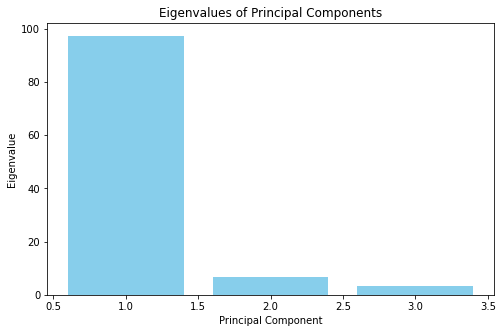

In [37]:
eigenvalues = pca.explained_variance_

# Plotting eigenvalues
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Principal Components')
plt.show()

In [19]:
# Data2
pca = PCA(n_components=3)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X2)
X_pca

array([[-1.28007890e+01,  6.38976410e+01, -2.53627878e+00],
       [-1.63650227e+01, -4.66367674e+00, -1.38843191e-01],
       [-1.63650227e+01, -4.66367674e+00, -1.38843191e-01],
       ...,
       [ 5.56940533e+01, -7.27621307e+00,  9.98291083e-02],
       [ 1.17958029e+01, -5.65016387e+00,  5.39494389e-02],
       [-3.03949113e+01, -4.11916357e+00, -1.57078146e-01]])

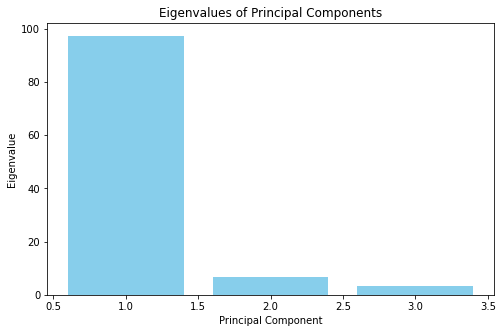

In [38]:
eigenvalues = pca.explained_variance_

# Plotting eigenvalues
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Principal Components')
plt.show()

### ICA

In [39]:
# Data1
ica = FastICA(n_components=3)  # Reducing to 2 dimensions for visualization
X_ica = ica.fit_transform(X1)
X_ica

array([[-2.65165662e-02, -8.10027746e-03, -1.13645369e-02],
       [ 6.46051984e-02,  8.33888224e-03, -1.88036522e-02],
       [ 3.30253979e-03, -5.07857338e-03, -1.94728485e-02],
       ...,
       [-3.54289160e-02, -8.11002901e-03, -1.08869393e-02],
       [-1.08348460e-02, -4.17700423e-03, -3.18113133e-05],
       [-2.04252622e-02,  1.73840691e-01,  1.78048744e-02]])

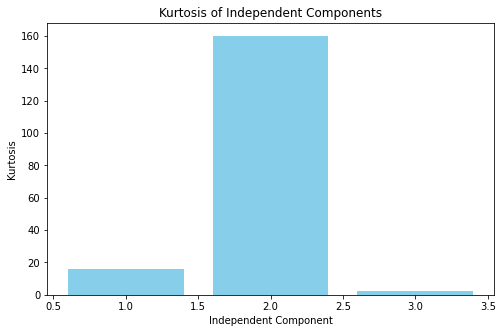

In [55]:
kurtosis = np.mean(np.abs((X_ica - X_ica.mean(axis=0))**4) / (X_ica.std(axis=0)**4), axis=0)

# Plotting kurtosis
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(kurtosis) + 1), kurtosis, color='skyblue')
plt.xlabel('Independent Component')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Independent Components')
plt.show()

In [54]:
# Data2
ica = FastICA(n_components=3)  # Reducing to 2 dimensions for visualization
X_ica = ica.fit_transform(X2)
X_ica


array([[ 0.03539125,  0.00481309,  0.00634804],
       [-0.00272757,  0.00060476,  0.00607724],
       [-0.00272757,  0.00060476,  0.00607724],
       ...,
       [-0.00314697,  0.00054082, -0.02112186],
       [-0.00290829,  0.00024021, -0.00456034],
       [-0.00263654,  0.00051937,  0.01137112]])

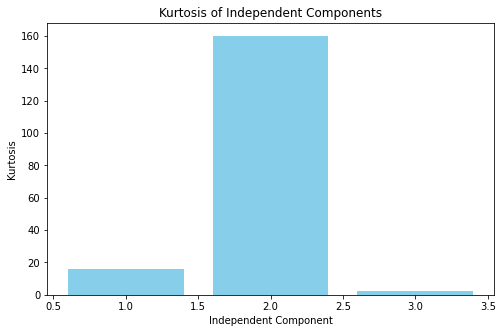

In [56]:
kurtosis = np.mean(np.abs((X_ica - X_ica.mean(axis=0))**4) / (X_ica.std(axis=0)**4), axis=0)

# Plotting kurtosis
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(kurtosis) + 1), kurtosis, color='skyblue')
plt.xlabel('Independent Component')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Independent Components')
plt.show()

### Randomized projection

In [28]:
# Data 1
rp = SparseRandomProjection(n_components=2)  
X_rp = rp.fit_transform(X1)
X_rp

array([[ -0.40593143,  -0.18274692],
       [-12.2185518 ,   6.22009066],
       [ -4.17960709,   1.39918072],
       ...,
       [  2.31403565,  -2.41028768],
       [  0.14847482,   0.13222217],
       [  5.87327302,   4.89227136]])

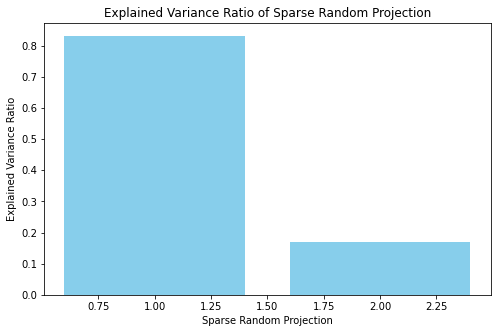

In [49]:
explained_variance_ratio = np.var(X_rp, axis=0) / np.sum(np.var(X_rp, axis=0))

# Plotting explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.xlabel('Sparse Random Projection')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Sparse Random Projection')
plt.show()

In [29]:
# Data 2
rp = SparseRandomProjection(n_components=2)  
X_rp = rp.fit_transform(X2)
X_rp


array([[-2439.69178381,  2505.82800687],
       [-2448.26499791,  2560.94152608],
       [-2448.26499791,  2560.94152608],
       ...,
       [-2356.40913256,  2559.71678121],
       [-2406.62367228,  2556.04254659],
       [-2458.06295688,  2558.49203634]])

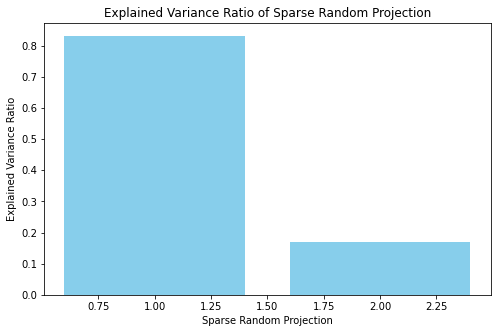

In [50]:
explained_variance_ratio = np.var(X_rp, axis=0) / np.sum(np.var(X_rp, axis=0))

# Plotting explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.xlabel('Sparse Random Projection')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Sparse Random Projection')
plt.show()

### Manifold Learning Algorithm ( t-SNE) 

In [58]:
# Data 1
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X1)

np.linalg.matrix_rank(X_tsne)

2

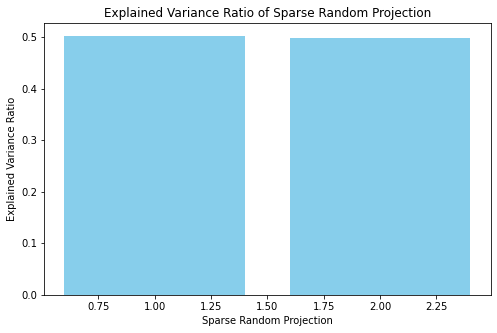

In [52]:
explained_variance_ratio = np.var(X_tsne, axis=0) / np.sum(np.var(X_tsne, axis=0))

# Plotting explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.xlabel('Sparse Random Projection')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Sparse Random Projection')
plt.show()

In [33]:
# Data 1
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X2)
X_tsne

array([[  5.4482574, -21.90801  ],
       [ 51.563442 , -48.32477  ],
       [ 50.971054 , -47.91273  ],
       ...,
       [ 45.80226  ,  21.966759 ],
       [ 54.2793   ,  -4.8891783],
       [-14.191639 , -52.361763 ]], dtype=float32)

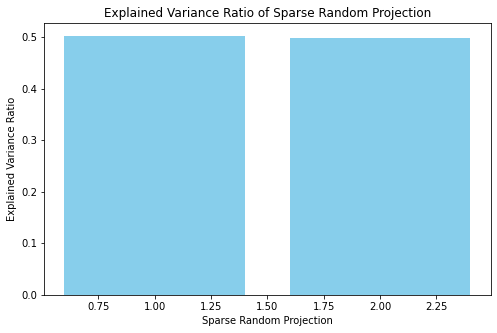

In [53]:
explained_variance_ratio = np.var(X_tsne, axis=0) / np.sum(np.var(X_tsne, axis=0))

# Plotting explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.xlabel('Sparse Random Projection')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Sparse Random Projection')
plt.show()